In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("spam.csv", encoding="latin1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

# 1) Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis="columns", inplace=True)

In [6]:
df.sample(5)

,v1,v2
183,ham,"He will, you guys close?"
2969,ham,U should make a fb list
4820,ham,Im good! I have been thinking about you...
1699,ham,Ok...
4220,ham,Plz note: if anyone calling from a mobile Co. ...


In [7]:
df.rename(columns={"v1":"target", "v2":"message"}, inplace=True)

In [8]:
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Import Library

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [10]:
df["target"] = encoder.fit_transform(df["target"])

In [11]:
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

target     0
message    0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df = df.drop_duplicates(keep= "first")

In [15]:
df.shape

(5169, 2)

# 2) EDA

In [16]:
df.value_counts()

target  message                                                                                                                           
0        &lt;#&gt;  in mca. But not conform.                                                                                                  1
        Thats cool. i liked your photos. You are very sexy!                                                                                   1
        That's good, because I need drugs                                                                                                     1
        That's fine, have him give me a call if he knows what he wants or has any questions                                                   1
        That's fine, I'll bitch at you about it later then                                                                                    1
                                                                                                                                             

In [17]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

#### Import Library

In [18]:
from matplotlib import pyplot as ppt 

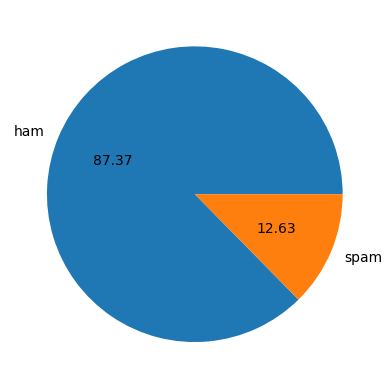

In [19]:
ppt.pie(df["target"].value_counts(), labels= ["ham", "spam"], autopct="%0.2f")
ppt.show()

#### Import Library

In [20]:
# first install this library through pip command
import nltk

In [21]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\Hp 840
[nltk_data]     G5\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to C:\Users\Hp 840
[nltk_data]     G5\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [23]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\Hp 840
[nltk_data]     G5\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [24]:
df["message"].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: message, Length: 5169, dtype: int64

In [25]:
#Number of Characters in one message 
df["num_characters"] = df["message"].apply(len)

In [26]:
df.head()

,target,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [27]:
# Number of words in one message
df["num_words"] = df["message"].apply(lambda x: len(nltk.wordpunct_tokenize(x)))

In [28]:
df.head()

,target,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16


In [29]:
# Number of Sentences
df["num_sentences"] = df["message"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,1


In [31]:
df[["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,19.202747,1.965564
std,58.236293,13.963696,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,28.000000,2.000000
max,910.000000,210.000000,38.000000


In [32]:
df[df["target"]==0][["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.448627,1.820195
std,56.358207,13.769106,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,9.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,210.000000,38.000000


In [33]:
df[df["target"]==1][["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,31.333844,2.970904
std,30.137753,7.997049,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,28.000000,2.000000
50%,149.000000,33.000000,3.000000
75%,157.000000,36.000000,4.000000
max,224.000000,49.000000,9.000000


#### Import Library

In [34]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

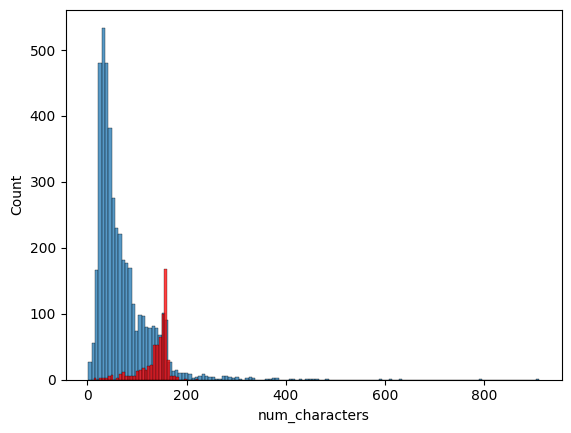

In [35]:
sns.histplot(df[df["target"]==0]["num_characters"])
sns.histplot(df[df["target"]==1]["num_characters"], color="red")

<Axes: xlabel='num_words', ylabel='Count'>

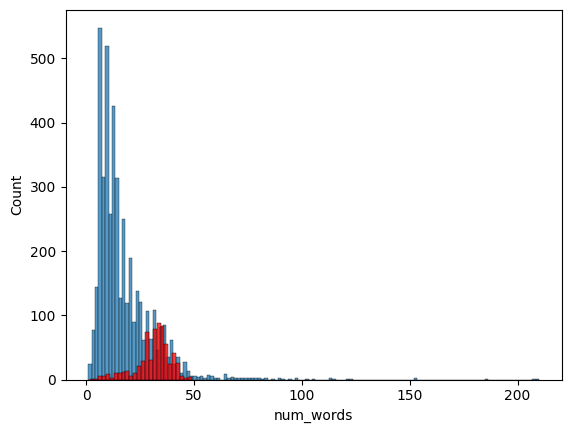

In [36]:
sns.histplot(df[df["target"]==0]["num_words"])
sns.histplot(df[df["target"]==1]["num_words"], color="red")

<Axes: xlabel='num_sentences', ylabel='Count'>

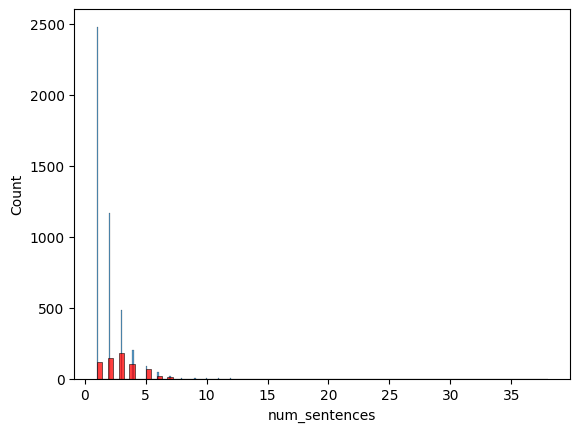

In [37]:
sns.histplot(df[df["target"]==0]["num_sentences"])
sns.histplot(df[df["target"]==1]["num_sentences"], color="red")

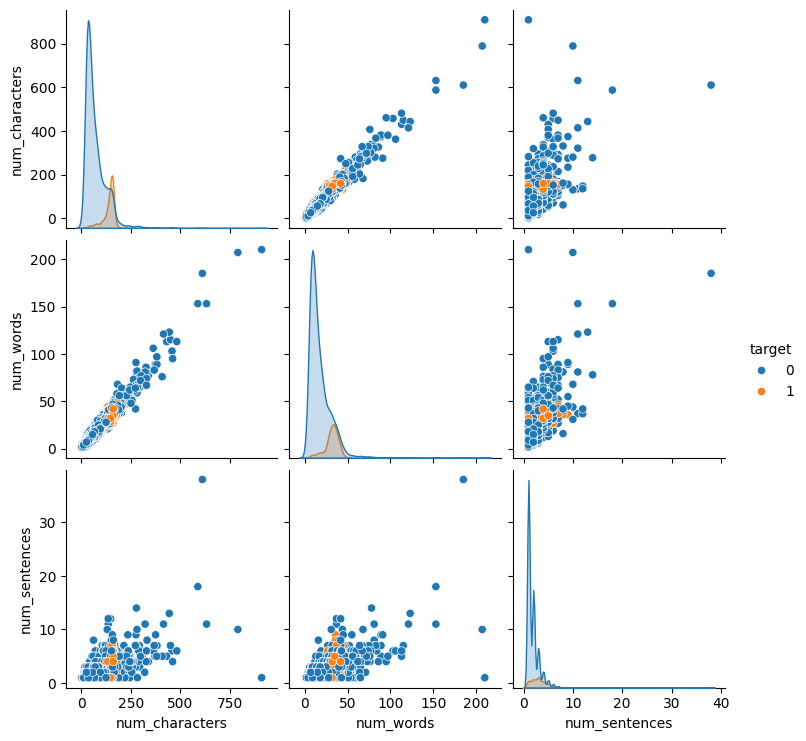

In [40]:
sns.pairplot(df, hue="target")

<Axes: >

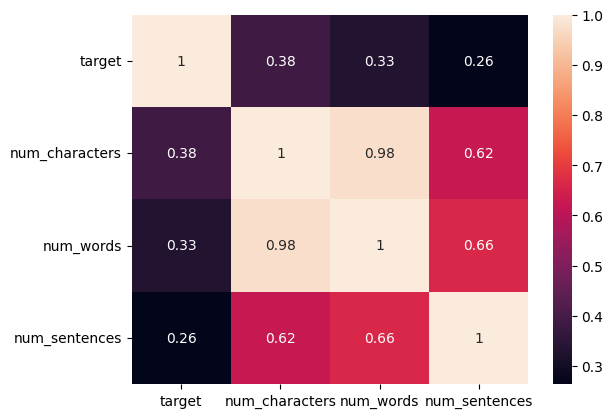

In [41]:
df_numeric = df[['target', 'num_characters', 'num_words', "num_sentences"]]
sns.heatmap(df_numeric.corr(), annot=True)

# 3) Data Preprocessing
##### Lower Case
##### Tokenization
##### Removing Special Characters
##### Removing Stop words and Punctuation
##### Stemming

In [42]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:] #assigning y to text through slicing
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y) 
    

#### Import Library

In [44]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [45]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

#### Import library

In [46]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [47]:
ps.stem("going")

'go'

In [48]:
df["transformed_message"] = df["message"].apply(transform_text)

In [49]:
df.head()

,target,message,num_characters,num_words,num_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,1,nah think goe usf live around though


In [52]:
transform_text("This IS me* Ahmad. Son of Iqbal Muhammad and who's your father?")

'ahmad son iqbal muhammad father'

#### Import Library

In [53]:
from wordcloud import WordCloud

In [54]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color="white")

In [55]:
spam_wc = wc.generate(df[df["target"]==1]["transformed_message"].str.cat(sep=" "))

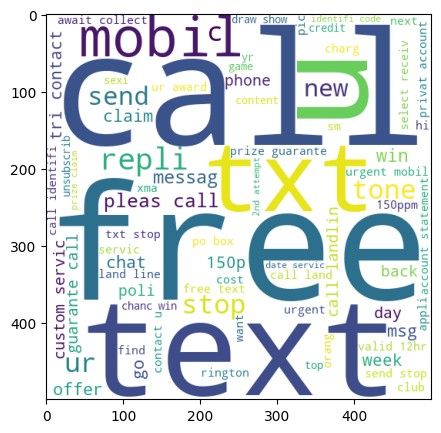

In [56]:
ppt.figure(figsize=(12,5))
ppt.imshow(spam_wc)

In [57]:
ham_wc= wc.generate(df[df["target"]==0]["transformed_message"].str.cat(sep=" "))

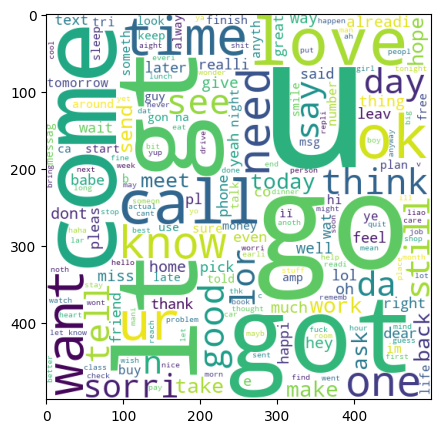

In [58]:
ppt.figure(figsize=(12,5))
ppt.imshow(ham_wc)

In [59]:
word_corpus=[]
for msg in df[df["target"]==1]["transformed_message"].tolist():
    for word in msg.split():
        word_corpus.append(word)
        
    

In [60]:
len(word_corpus)

9939

#### Import Library

In [61]:
from collections import Counter

In [62]:
Counter(word_corpus)

Counter({'call': 320,
         'free': 191,
         '2': 155,
         'txt': 141,
         'text': 122,
         'u': 119,
         'ur': 119,
         'mobil': 114,
         'stop': 104,
         'repli': 103,
         'claim': 98,
         '4': 97,
         'prize': 82,
         'get': 74,
         'new': 64,
         'servic': 64,
         'tone': 63,
         'send': 60,
         'urgent': 57,
         'nokia': 57,
         'contact': 56,
         'award': 55,
         'phone': 52,
         'cash': 51,
         'pleas': 51,
         'week': 49,
         'win': 48,
         'c': 45,
         'collect': 45,
         'min': 45,
         'custom': 42,
         'messag': 42,
         'guarante': 42,
         'per': 41,
         'chat': 38,
         'tri': 37,
         'msg': 35,
         'draw': 35,
         'number': 35,
         'cs': 35,
         'show': 33,
         'today': 33,
         'offer': 33,
         'line': 33,
         'go': 32,
         'receiv': 31,
         'want': 3

In [63]:
Counter(word_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [66]:
pd.DataFrame(Counter(word_corpus).most_common(30), columns=['word', 'count'])

,word,count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


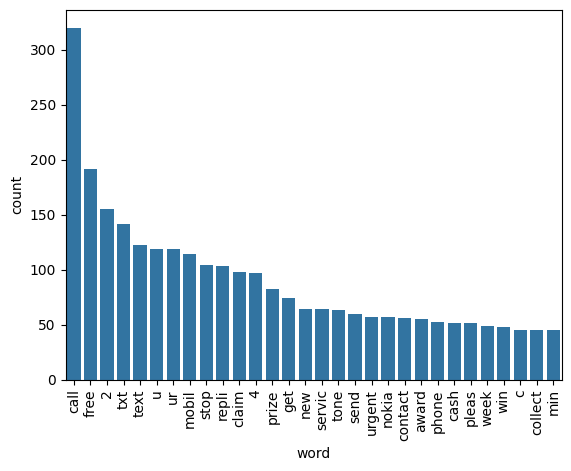

In [67]:
# Create the DataFrame from the Counter
spam_common_words = pd.DataFrame(Counter(word_corpus).most_common(30), columns=['word', 'count'])

# Plot using sns.barplot with x as 'word' and y as 'count'
sns.barplot(x='word', y='count', data=spam_common_words)

ppt.xticks(rotation="vertical")
ppt.show()

In [68]:
df.columns

Index(['target', 'message', 'num_characters', 'num_words', 'num_sentences',
       'transformed_message'],
      dtype='object')

In [69]:
ham_corpus=[]
for mesg in df[df["target"]==0]["transformed_message"].tolist():
    for word in mesg.split():
        ham_corpus.append(word)

In [70]:
len(ham_corpus)

35404

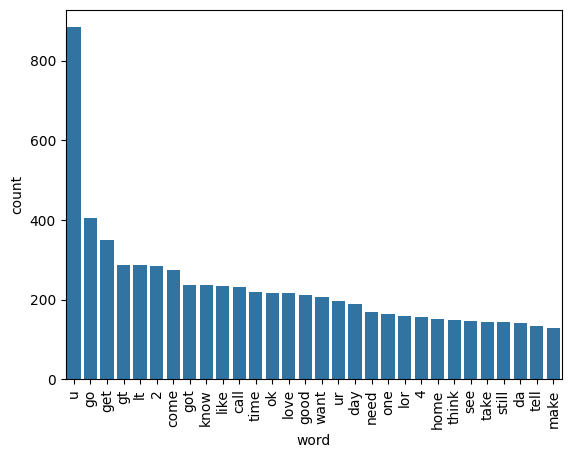

In [71]:
ham_common_word = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=["word", "count"])
sns.barplot(x="word", y="count",  data=ham_common_word)
ppt.xticks(rotation="vertical")
ppt.show()

In [72]:
df.columns

Index(['target', 'message', 'num_characters', 'num_words', 'num_sentences',
       'transformed_message'],
      dtype='object')

In [73]:
df

,target,message,num_characters,num_words,num_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,39,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,16,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,42,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,28,1,guy bitch act like interest buy someth els nex...


# 4) Handling Imbalanced Data

In [74]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid_vec = TfidfVectorizer(max_features=3000)

In [75]:
#first tried with cv (CountVectorizer) then move to TF-IDF
x=tfid_vec.fit_transform(df["transformed_message"]).toarray()

In [76]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [77]:
x.shape

(5169, 3000)

In [78]:
y= df["target"].values

In [79]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [80]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(sampling_strategy="auto", random_state=42)  # Balancing ratio
X_resampled, y_resampled = smote.fit_resample(x, y)

print("Class distribution before SMOTE:", Counter(y))
print("Class distribution after SMOTE:", Counter(y_resampled))


Class distribution before SMOTE: Counter({0: 4516, 1: 653})
Class distribution after SMOTE: Counter({0: 4516, 1: 4516})


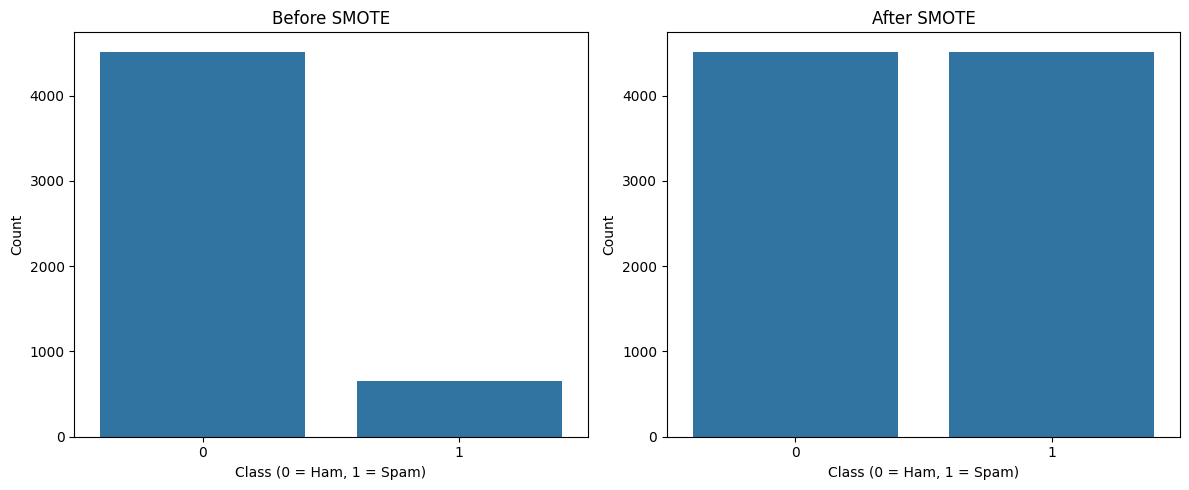

In [83]:
# Class distribution before and after SMOTE
before_counts = Counter(y)
after_counts = Counter(y_resampled)

# Create bar plots
fig, axes = ppt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
sns.barplot(x=list(before_counts.keys()), y=list(before_counts.values()), ax=axes[0])
axes[0].set_title("Before SMOTE")
axes[0].set_xlabel("Class (0 = Ham, 1 = Spam)")
axes[0].set_ylabel("Count")

# After SMOTE
sns.barplot(x=list(after_counts.keys()), y=list(after_counts.values()), ax=axes[1])
axes[1].set_title("After SMOTE")
axes[1].set_xlabel("Class (0 = Ham, 1 = Spam)")
axes[1].set_ylabel("Count")

ppt.tight_layout()
ppt.show()

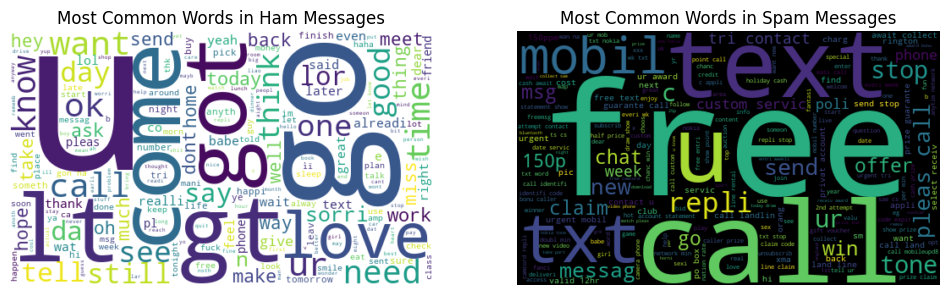

In [87]:
# Convert ham and spam messages into separate text blocks
ham_text = " ".join(df[df["target"] == 0]["transformed_message"])
spam_text = " ".join(df[df["target"] == 1]["transformed_message"])

# Generate word clouds
fig, axes = ppt.subplots(1, 2, figsize=(12, 7))

ham_wc = WordCloud(width=500, height=300, background_color="white").generate(ham_text)
spam_wc = WordCloud(width=500, height=300, background_color="black").generate(spam_text)

# Plot word clouds
axes[0].imshow(ham_wc, interpolation="bilinear")
axes[0].set_title("Most Common Words in Ham Messages")
axes[0].axis("off")

axes[1].imshow(spam_wc, interpolation="bilinear")
axes[1].set_title("Most Common Words in Spam Messages")
axes[1].axis("off")

ppt.show()

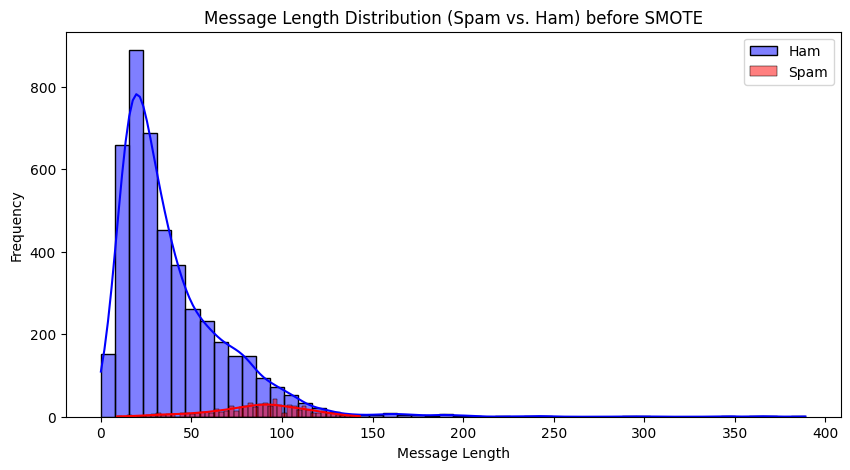

In [92]:
df["message_length"] = df["transformed_message"].apply(len)

# Plot distribution
ppt.figure(figsize=(10, 5))
sns.histplot(df[df["target"] == 0]["message_length"], bins=50, color="blue", label="Ham", kde=True)
sns.histplot(df[df["target"] == 1]["message_length"], bins=50, color="red", label="Spam", kde=True)

ppt.xlabel("Message Length")
ppt.ylabel("Frequency")
ppt.title("Message Length Distribution (Spam vs. Ham) before SMOTE")
ppt.legend()
ppt.show()

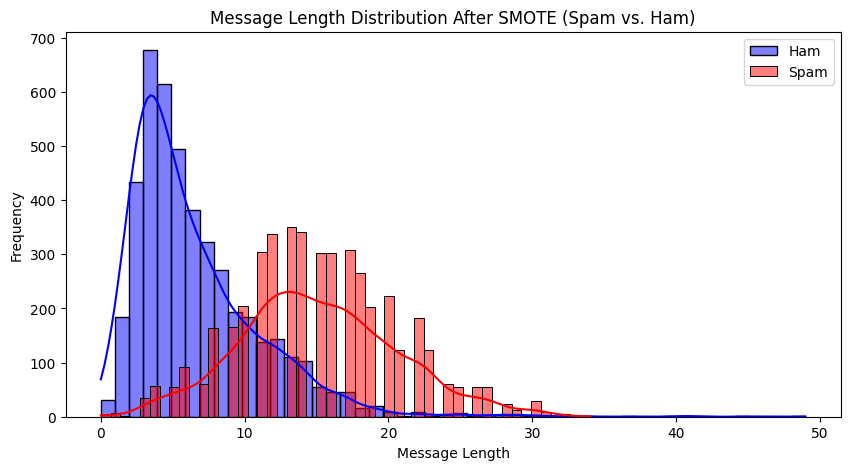

In [91]:
import numpy as np

# Calculate message lengths for resampled data (after SMOTE)
resampled_message_lengths = [len(msg) for msg in tfid_vec.inverse_transform(X_resampled)]

# Convert to DataFrame
resampled_df = pd.DataFrame({"message_length": resampled_message_lengths, "target": y_resampled})

# Plot distribution after SMOTE
ppt.figure(figsize=(10, 5))
sns.histplot(resampled_df[resampled_df["target"] == 0]["message_length"], bins=50, color="blue", label="Ham", kde=True)
sns.histplot(resampled_df[resampled_df["target"] == 1]["message_length"], bins=50, color="red", label="Spam", kde=True)

ppt.xlabel("Message Length")
ppt.ylabel("Frequency")
ppt.title("Message Length Distribution After SMOTE (Spam vs. Ham)")
ppt.legend()
ppt.show()


# 5) Model Building

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test= train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=2)

In [140]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [141]:
gnb = GaussianNB()
mnb = MultinomialNB(alpha=0.1, fit_prior=False)
bnb = BernoulliNB(alpha=0.1, binarize=0.0)

In [142]:
# Model Evaluation
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1))
print("Recall:", recall_score(y_test, y_pred1))  
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))

# More detailed evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred1))

Accuracy: 0.9266943291839558
Precision: 0.8739290085679314
Recall: 0.99581589958159
Confusion Matrix:
 [[626 103]
 [  3 714]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.86      0.92       729
           1       0.87      1.00      0.93       717

    accuracy                           0.93      1446
   macro avg       0.93      0.93      0.93      1446
weighted avg       0.94      0.93      0.93      1446



In [143]:
mnb.fit(X_train, y_train)
y_pred2= mnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Precision:", precision_score(y_test, y_pred2))
print("Recall:", recall_score(y_test, y_pred2))  
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))

# More detailed evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred2))

Accuracy: 0.9757952973720608
Precision: 0.9802816901408451
Recall: 0.9707112970711297
Confusion Matrix:
 [[715  14]
 [ 21 696]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       729
           1       0.98      0.97      0.98       717

    accuracy                           0.98      1446
   macro avg       0.98      0.98      0.98      1446
weighted avg       0.98      0.98      0.98      1446



In [144]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Precision:", precision_score(y_test, y_pred3))
print("Recall:", recall_score(y_test, y_pred3))  
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred3))

# More detailed evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred3))

Accuracy: 0.983402489626556
Precision: 1.0
Recall: 0.9665271966527197
Confusion Matrix:
 [[729   0]
 [ 24 693]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       729
           1       1.00      0.97      0.98       717

    accuracy                           0.98      1446
   macro avg       0.98      0.98      0.98      1446
weighted avg       0.98      0.98      0.98      1446



In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

# Define parameter grids
mnb_params = {'alpha': [0.1, 0.5, 1, 1.5, 2], 'fit_prior': [True, False]}
bnb_params = {'alpha': [0.1, 0.5, 1, 1.5, 2], 'binarize': [0.0, 0.1, 0.5]}

# Initialize models
mnb = MultinomialNB()
bnb = BernoulliNB()

# Perform Grid Search for MNB
mnb_grid = GridSearchCV(mnb, mnb_params, scoring='accuracy', cv=5, n_jobs=-1)
mnb_grid.fit(X_train, y_train)

# Perform Grid Search for BNB
bnb_grid = GridSearchCV(bnb, bnb_params, scoring='accuracy', cv=5, n_jobs=-1)
bnb_grid.fit(X_train, y_train)

# Print best parameters and best accuracy
print("Best parameters for MNB:", mnb_grid.best_params_)
print("Best Accuracy for MNB:", mnb_grid.best_score_)

print("Best parameters for BNB:", bnb_grid.best_params_)
print("Best Accuracy for BNB:", bnb_grid.best_score_)


Best parameters for MNB: {'alpha': 0.1, 'fit_prior': False}
Best Accuracy for MNB: 0.9767474048442907
Best parameters for BNB: {'alpha': 0.1, 'binarize': 0.0}
Best Accuracy for BNB: 0.9822837370242216


In [137]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# Step 1: Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)  # Oversample only training data

# Step 2: Define Naïve Bayes models with optimized hyperparameters
mnb = MultinomialNB(alpha=0.1, fit_prior=False)
bnb = BernoulliNB(alpha=0.1, binarize=0.0)

# Step 3: Create and train the VotingClassifier on SMOTE data
voting_clf = VotingClassifier(estimators=[('mnb', mnb), ('bnb', bnb)], voting='soft')  # Soft voting for probability-based decision
voting_clf.fit(X_resampled, y_resampled)  # Train on SMOTE-balanced data

# Step 4: Make predictions on test data (original X_test)
y_pred_voting = voting_clf.predict(X_test)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred_voting)
precision = precision_score(y_test, y_pred_voting)
recall = recall_score(y_test, y_pred_voting)

# Print results
print("Ensemble Model (MNB + BNB) on SMOTE Data:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_voting))
print("\nClassification Report:\n", classification_report(y_test, y_pred_voting))


Ensemble Model (MNB + BNB) on SMOTE Data:
Accuracy: 0.9867183176535694
Precision: 0.9988623435722411
Recall: 0.974472807991121
Confusion Matrix:
 [[905   1]
 [ 23 878]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       906
           1       1.00      0.97      0.99       901

    accuracy                           0.99      1807
   macro avg       0.99      0.99      0.99      1807
weighted avg       0.99      0.99      0.99      1807



In [80]:
#tdidf & MNB

In [81]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier

In [82]:
# svc = SVC(kernel="sigmoid", gamma=1.0)
# lr = LogisticRegression(solver="liblinear", penalty="l1")
# mnb = MultinomialNB()
# dt = DecisionTreeClassifier(max_depth=5)
# knc = KNeighborsClassifier()
# rfc = RandomForestClassifier(n_estimators=50, random_state=2)
# abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# bc = BaggingClassifier(n_estimators=50, random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
# xgb = XGBClassifier(n_estimators=50, random_state=2)

In [83]:
# clfs = {
#     "SVC": svc,
#     "LR" : lr,
#     "MNB": mnb,
#     "DT": dt,
#     "KNC": knc,
#     "RFC": rfc,
#     "ABC": abc,
#     "BC": bc,
#     "ETC": etc,
#     "GBC": gbc,
#     "XGB": xgb
# }

In [84]:
# def train_classifier(clf, X_train, y_train, X_test, y_test):
#     clf.fit(X_train, y_train)
#     y1_pred = clf.predict(X_test)
#     acc = accuracy_score(y1_pred, y_test)
#     prec = precision_score(y1_pred, y_test)

#     return acc, prec

In [145]:
import pickle 
pickle.dump(tfid_vec, open("tfidf_vectorizer.pkl", "wb"))
pickle.dump(bnb, open("bnb_model.pkl","wb"))

In [146]:
# Step 1: Define a new message (this is the message you want to test)
new_message = ["Love u dude"]

# Step 2: Preprocess the new message using the same TfidfVectorizer
# Make sure to use the already fitted tfid_vec (the one you used for training)
new_message_transformed = tfid_vec.transform(new_message)

# Step 3: Use your trained model to predict if the message is spam or not
prediction = mnb.predict(new_message_transformed)

# Step 4: Print the result
if prediction[0] == 1:  # Assuming 1 is spam and 0 is not spam
    print("The message is spam.")
else:
    print("The message is not spam.")


The message is not spam.


In [147]:
new_message = ["Congratulations! You've won a lottery. Claim your prize now!"]

# Apply the transform_text function to preprocess the message
new_message_preprocessed = transform_text(new_message[0])

# Transform the preprocessed message using the already fitted TfidfVectorizer
new_message_transformed = tfid_vec.transform([new_message_preprocessed])

# Use the trained model to predict if it's spam or not
prediction = mnb.predict(new_message_transformed)

# Print the result
if prediction[0] == 1:
    print("The message is spam.")
else:
    print("The message is not spam.")


The message is spam.
